In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


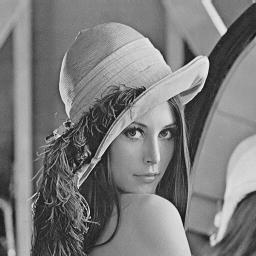

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
#plt.imshow(gImg, cmap='gray')
cv2_imshow(gImg)

In [ ]:
gx = np.array([[-1, 0], [0, 1]], dtype = int)
gy = np.array([[0, 1], [-1, 0]], dtype = int)

In [ ]:
x = cv2.filter2D(gImg, -1, gx)  #-1: 입력영상과 같은 크기의 출력 영상을 생성
y = cv2.filter2D(gImg, -1, gy)

In [ ]:
absX = cv2.convertScaleAbs(x)  #절댓값
absY = cv2.convertScaleAbs(y)

In [ ]:
outImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)  #최종 결과물 = absX + absY (가중치 0.5씩)

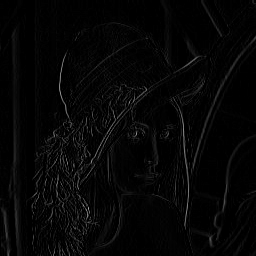

In [ ]:
cv2_imshow(outImg)

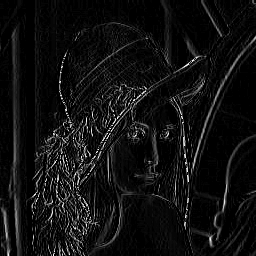

In [ ]:
outImg = outImg * 3  #화면에 잘 보이게 값 좀 키움
cv2_imshow(outImg)

In [ ]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)  #까만 이미지, 즉 0으로 된 이미지 생성

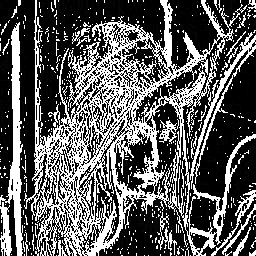

In [ ]:
threshold = 10
for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if (outImg[h,w] > threshold):
      outImg[h,w] = 255

cv2_imshow(outImg)